**Task 1 - Exploration of customer purchasing behaviour**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

# Train Data

In [22]:
train_data = pd.read_csv('train.csv')

In [23]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
train_data.shape

(1017209, 9)

In [5]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
train_data.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000


In [9]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [12]:
## We can find discrepancy in data types

train_data['Store']=train_data['Store'].astype('object')
train_data['DayOfWeek']=train_data['DayOfWeek'].astype('object')
train_data['Open']=train_data['Open'].astype('object')
train_data['Promo']=train_data['Promo'].astype('object')
train_data['SchoolHoliday']=train_data['SchoolHoliday'].astype('object')
train_data['StateHoliday']=train_data['StateHoliday'].astype('string')

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  object
 1   DayOfWeek      1017209 non-null  object
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  object
 6   Promo          1017209 non-null  object
 7   StateHoliday   1017209 non-null  string
 8   SchoolHoliday  1017209 non-null  object
dtypes: int64(2), object(6), string(1)
memory usage: 69.8+ MB


***Seperating Categorical and Numerical Columns***

In [17]:
categorical_cols=[]
numerical_cols=[]
for col in train_data.columns:
  if train_data[col].dtypes == "object":
    categorical_cols.append(col)
  elif train_data[col].dtypes == "string":
    categorical_cols.append(col)
  elif train_data[col].dtypes != "object":
    numerical_cols.append(col)

***Checking the correlation between Sales And Customer***

In [14]:
train_data.corr()

,Sales,Customers
Sales,1.000000,0.894711
Customers,0.894711,1.000000


***Checking for Outlier's in Sales & Customer***

<Axes: ylabel='Customers'>

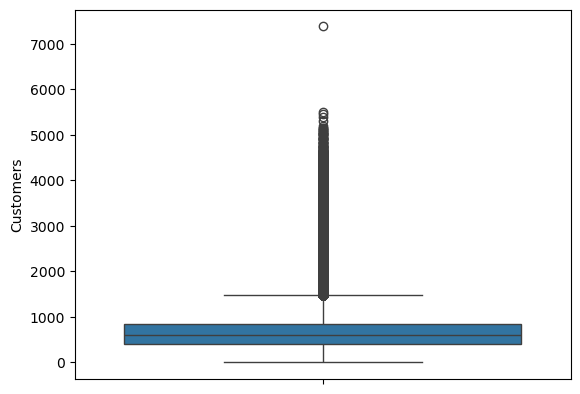

In [15]:
sns.boxplot(train_data.Customers)

<Axes: ylabel='Sales'>

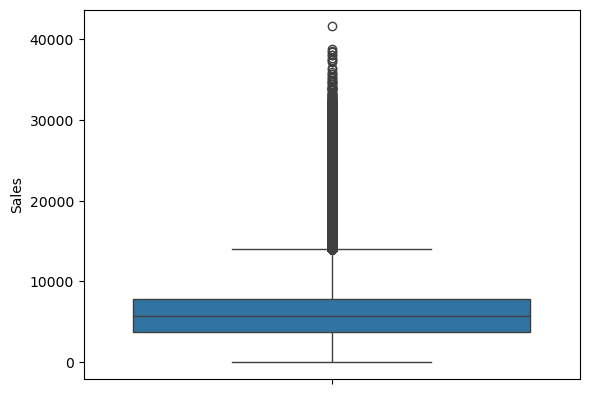

In [16]:
sns.boxplot(train_data.Sales)

***Taking out Top 10 Categories and Making a bar Chart***

Top 10 categories for Store
1      942
261    942
248    942
249    942
250    942
251    942
252    942
253    942
254    942
255    942
Name: Store, dtype: int64


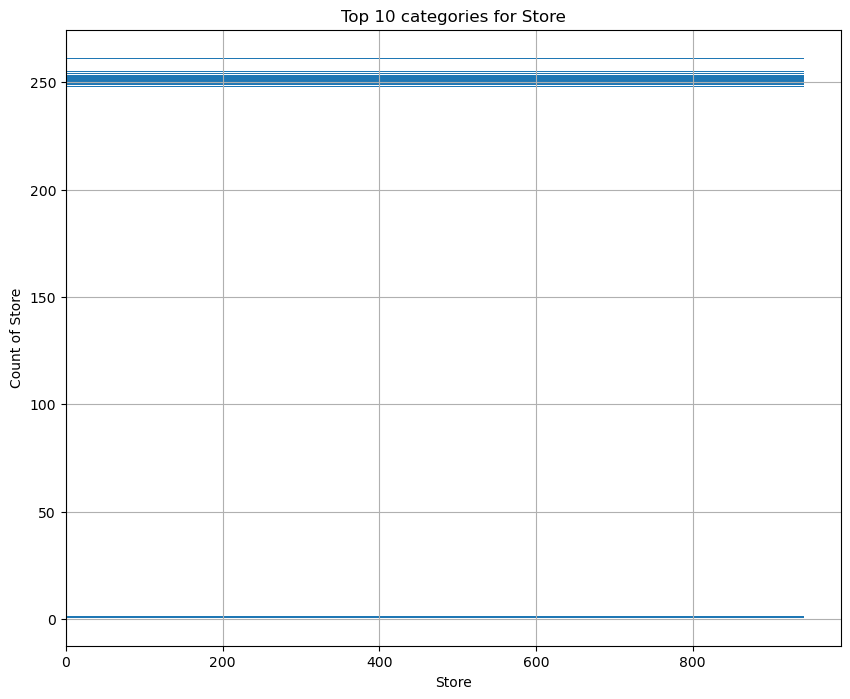

Top 10 categories for DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64


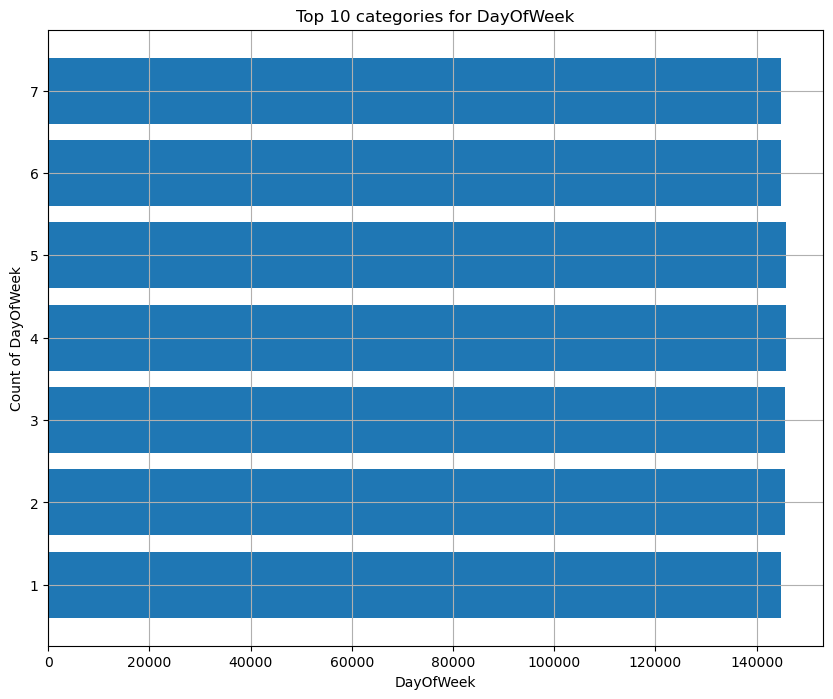

Top 10 categories for Date
2015-07-31    1115
2015-05-13    1115
2015-03-22    1115
2015-03-23    1115
2015-03-24    1115
2015-03-25    1115
2015-03-26    1115
2015-03-27    1115
2015-04-15    1115
2015-04-17    1115
Name: Date, dtype: int64


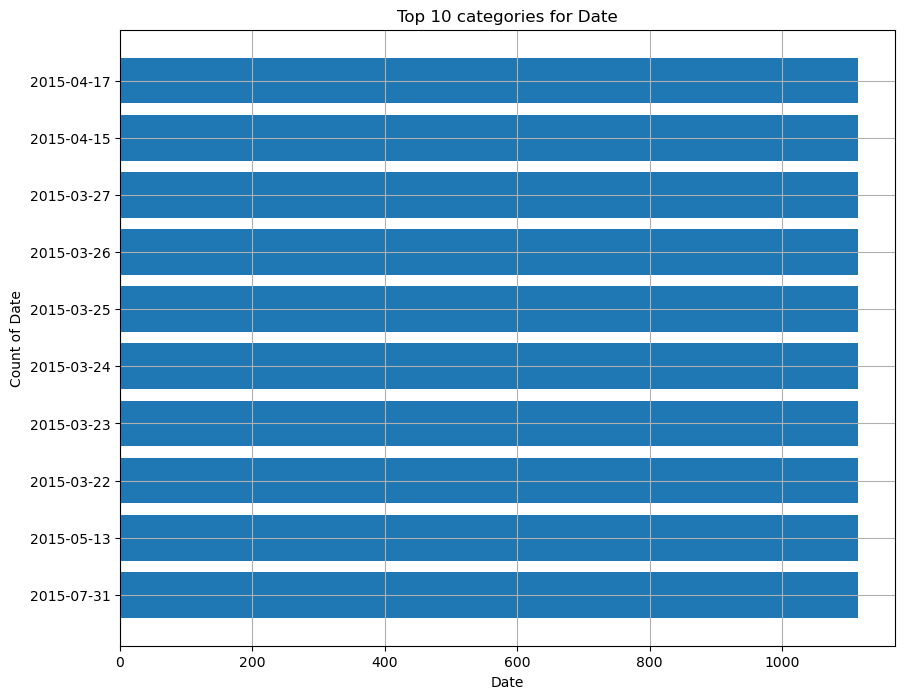

Top 10 categories for Open
1    844392
0    172817
Name: Open, dtype: int64


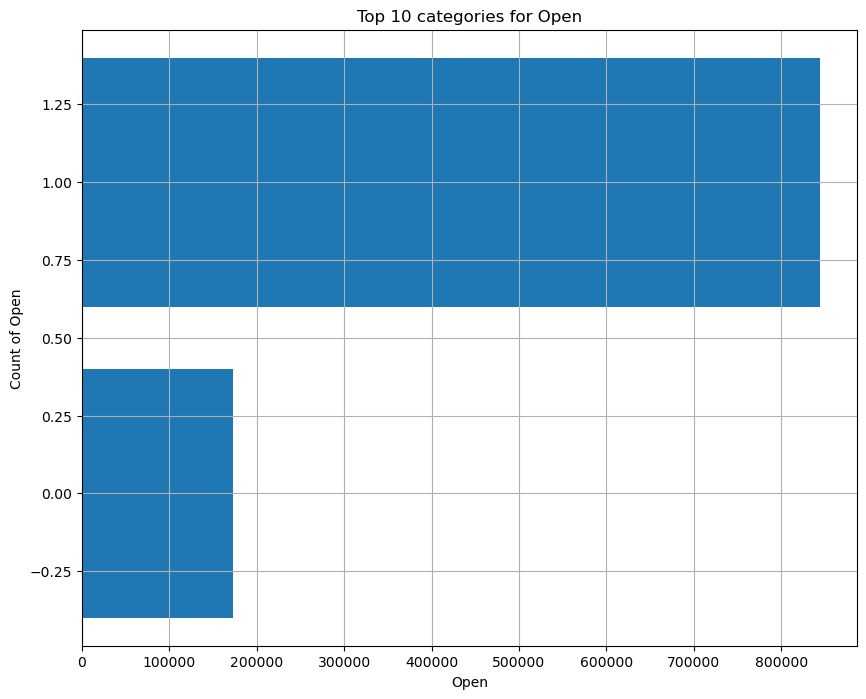

Top 10 categories for Promo
0    629129
1    388080
Name: Promo, dtype: int64


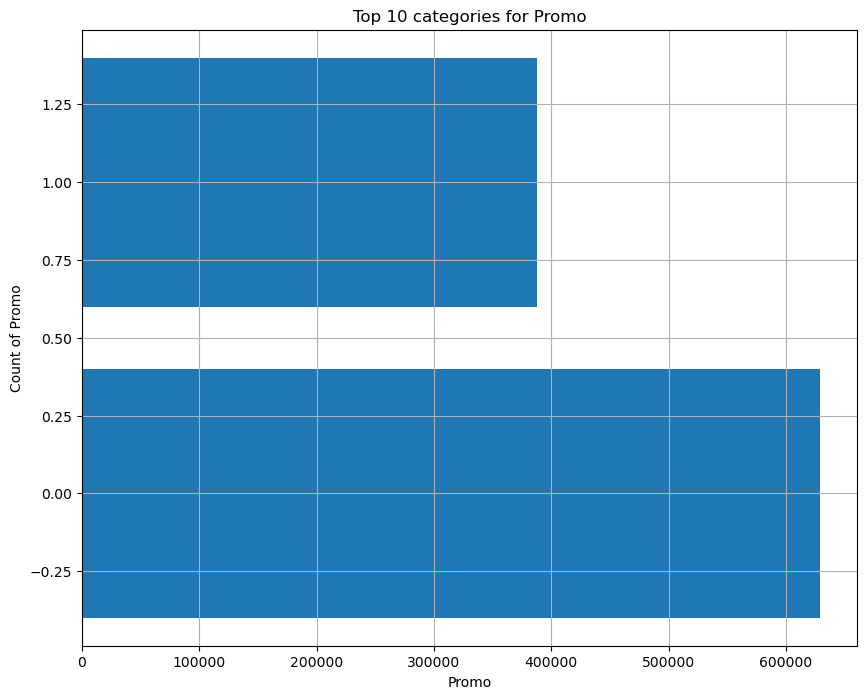

Top 10 categories for StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: Int64


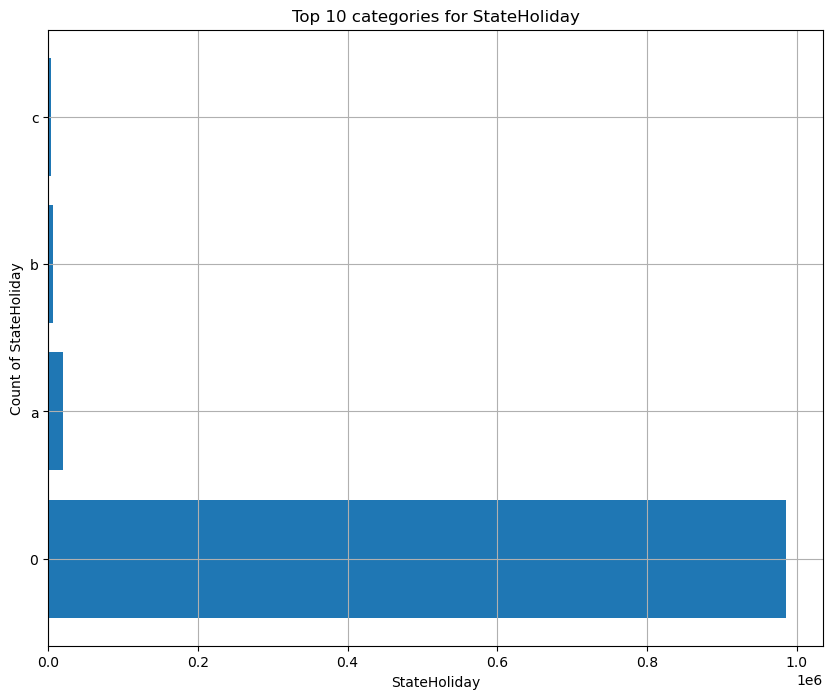

Top 10 categories for SchoolHoliday
0    835488
1    181721
Name: SchoolHoliday, dtype: int64


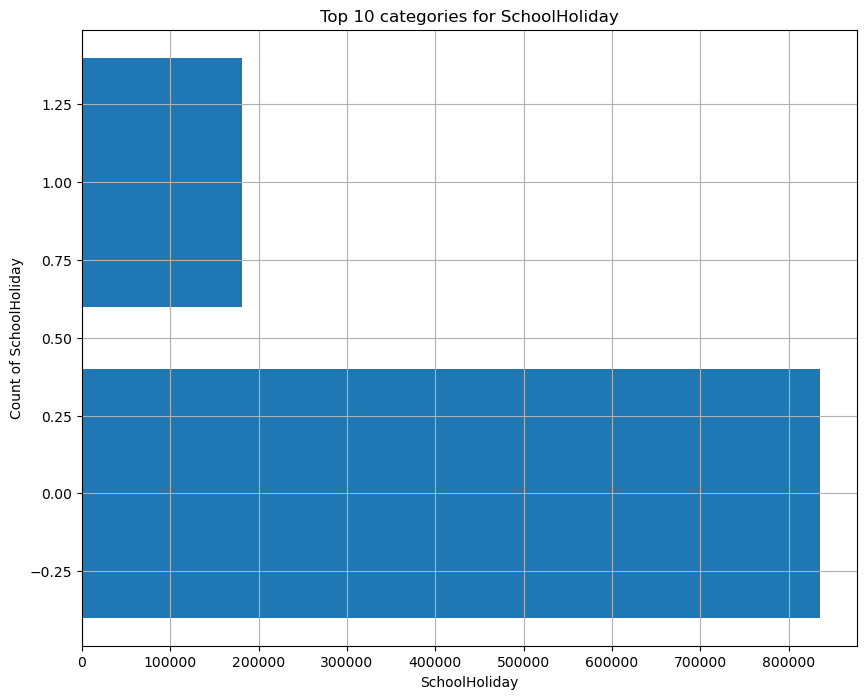

In [21]:
for col in categorical_cols:
    print("Top 10 categories for {}".format(col))
    print(train_data[col].value_counts().sort_values(ascending = False).head(10))
    index = train_data[col].value_counts().sort_values(ascending = False).head(10).index
    values = train_data[col].value_counts().sort_values(ascending = False).head(10).values
    plt.figure(figsize = [10,8])
    plt.barh(index,values)
    plt.xlabel(col)
    plt.ylabel("Count of {}".format(col))
    plt.title("Top 10 categories for {}".format(col))
    plt.grid()
    plt.show()

# Test Data

In [20]:
test_data = pd.read_csv('test.csv')

In [21]:
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [24]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [25]:
## We can find discrepancy in data types
test_data['Id']=test_data['Id'].astype('object')
test_data['Store']=test_data['Store'].astype('object')
test_data['DayOfWeek']=test_data['DayOfWeek'].astype('object')
test_data['Open']=test_data['Open'].astype('object')
test_data['Promo']=test_data['Promo'].astype('object')
test_data['SchoolHoliday']=test_data['SchoolHoliday'].astype('object')

In [28]:
test_data.dtypes

Id               object
Store            object
DayOfWeek        object
Date             object
Open             object
Promo            object
StateHoliday     object
SchoolHoliday    object
dtype: object

In [29]:
test_data.dtypes

Id               object
Store            object
DayOfWeek        object
Date             object
Open             object
Promo            object
StateHoliday     object
SchoolHoliday    object
dtype: object

***Checking the Promotion Distribution***

In [30]:
train_data_promo = train_data['Promo'].value_counts()

In [31]:
train_data_promo

0    629129
1    388080
Name: Promo, dtype: int64

Text(0.5, 1.0, 'Train Data Promo ')

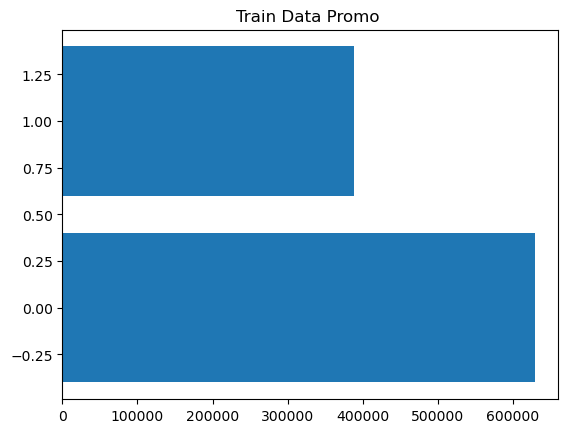

In [42]:
plt.barh(train_data_promo.index,train_data_promo.values)
plt.title("Train Data Promo ")

In [39]:
test_data_promo = test_data['Promo'].value_counts()

In [40]:
test_data_promo

0    24824
1    16264
Name: Promo, dtype: int64

Text(0.5, 1.0, 'Train Data Promo')

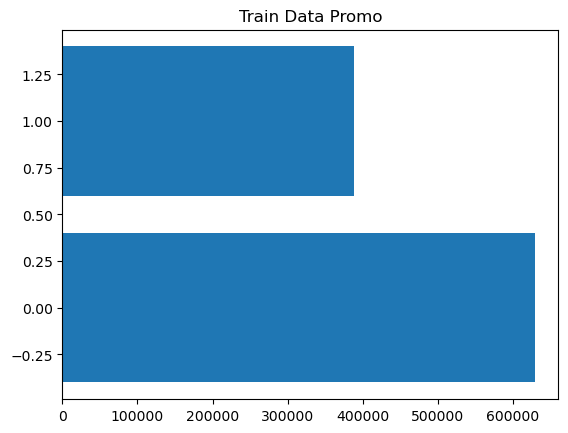

In [43]:
plt.barh(train_data_promo.index,train_data_promo.values)
plt.title("Train Data Promo")

***Checking Sales Behavior as per Holidays***

In [48]:
train_data['Holiday'] = train_data['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

In [49]:
train_data['Holiday']

0          0
1          0
2          0
3          0
4          0
          ..
1017204    1
1017205    1
1017206    1
1017207    1
1017208    1
Name: Holiday, Length: 1017209, dtype: int64

***Sales Before Holiday***

In [51]:
sales_before_holiday = train_data[train_data['Holiday'] == 0]['Sales']
sales_before_holiday

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1016090     5097
1016091    10797
1016092     6218
1016093    20642
1016094     3697
Name: Sales, Length: 986159, dtype: int64

***Average Sales Before Holiday***

In [61]:
average_sales_before_holiday = sales_before_holiday.mean()
average_sales_before_holiday

5947.48389255688

***Sales During Holiday***

In [53]:
sales_during_holiday = train_data[train_data['Holiday'] == 1]['Sales']
sales_during_holiday

63555         0
63557         0
63559      5807
63560      5749
63563         0
           ... 
1017204       0
1017205       0
1017206       0
1017207       0
1017208       0
Name: Sales, Length: 31050, dtype: int64

***Average Sales During Holiday***

In [63]:
Average_Sales_During_Holiday = sales_during_holiday.mean()
Average_Sales_During_Holiday

258.1595813204509

***Sales After Holiday***

In [60]:
sales_after_holiday = train_data[train_data['Holiday'].shift(-1) == 1]['Sales']
sales_after_holiday 

63554      11435
63556       5810
63558      10200
63559       5807
63562       7964
           ...  
1017203        0
1017204        0
1017205        0
1017206        0
1017207        0
Name: Sales, Length: 31050, dtype: int64

***Average Sales After Holiday***

In [65]:
Average_Sales_After_Holiday = sales_after_holiday.mean()
Average_Sales_After_Holiday

795.3129468599034

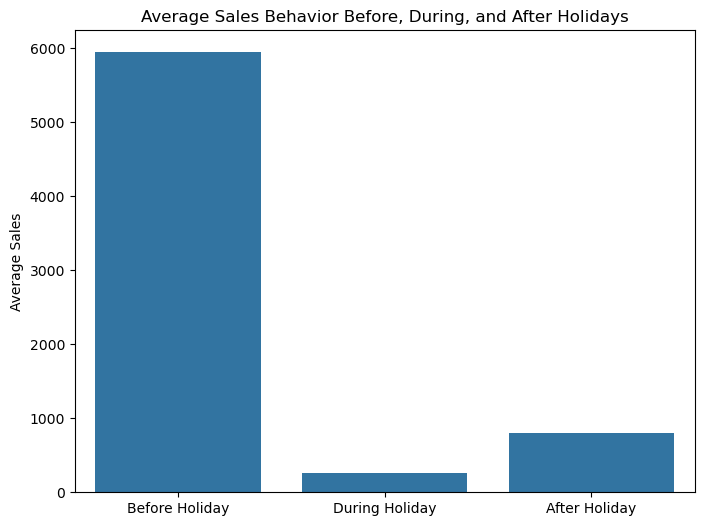

In [67]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Holiday', 'During Holiday', 'After Holiday'],
            y=[average_sales_before_holiday, Average_Sales_During_Holiday, Average_Sales_After_Holiday])
            
plt.title('Average Sales Behavior Before, During, and After Holidays')
plt.ylabel('Average Sales')
plt.show()

***TOTAL SALES***

In [70]:
total_sales_before_holiday = sales_before_holiday.sum()
total_sales_before_holiday

5865164768

In [71]:
total_sales_during_holiday = sales_during_holiday.sum()
total_sales_during_holiday

8015855

In [72]:
total_sales_after_holiday = sales_after_holiday .sum()
total_sales_after_holiday

24694467

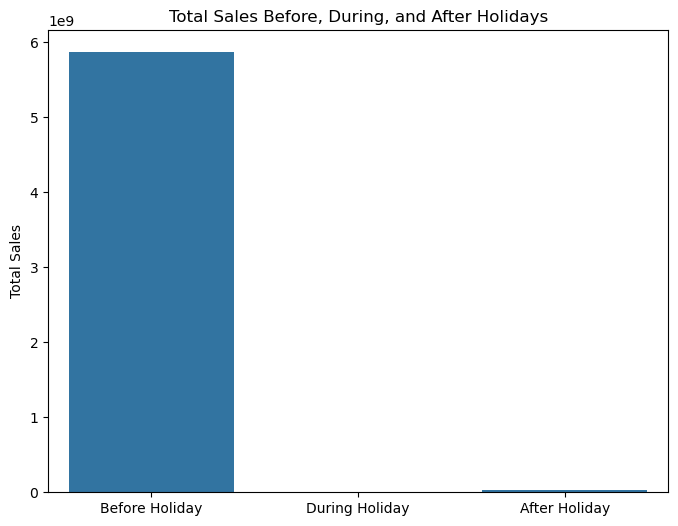

In [76]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Holiday', 'During Holiday', 'After Holiday'],
            y=[total_sales_before_holiday, total_sales_during_holiday, total_sales_after_holiday],)
plt.title('Total Sales Before, During, and After Holidays')
plt.ylabel('Total Sales')
plt.show()

***SEASONAL SALES***

In [78]:
def is_christmas(date):
    return date.month == 12 and date.day in [24, 25, 26, 27, 28, 29, 30, 31]

def is_easter(date):
    return date.month == 4 and date.day in [18, 19, 20, 21, 22, 23, 24, 25]

train_data['Christmas'] = train_data['Date'].apply(lambda x: 1 if is_christmas(pd.to_datetime(x)) else 0)
train_data['Easter'] = train_data['Date'].apply(lambda x: 1 if is_easter(pd.to_datetime(x)) else 0)

***CUSTOMER IN HOLIDAYS***

In [82]:
Average_Customers_Christmas = train_data.groupby('Christmas')['Customers'].mean()
Average_Customers_Christmas

Christmas
0    636.192309
1    447.241829
Name: Customers, dtype: float64

In [84]:
Average_Customers_Easter = train_data.groupby('Easter')['Customers'].mean()
Average_Customers_Easter

Easter
0    634.995727
1    564.681315
Name: Customers, dtype: float64

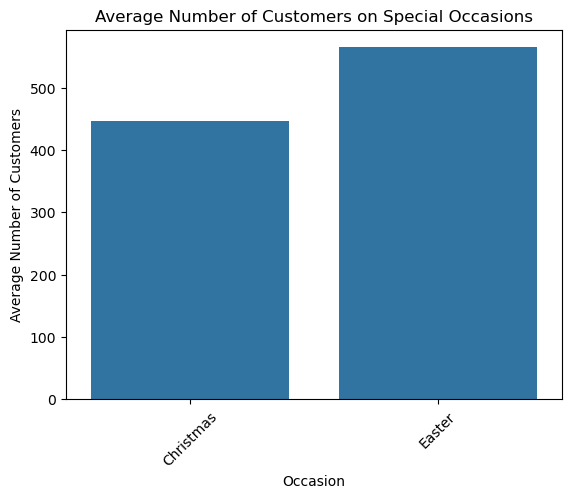

In [85]:
sns.barplot(x=['Christmas', 'Easter'],
            y=[Average_Customers_Christmas[1], Average_Customers_Easter[1]])
plt.title('Average Number of Customers on Special Occasions')
plt.xlabel('Occasion')
plt.ylabel('Average Number of Customers')
plt.xticks(rotation=45)
plt.show()

***PROMO SALES EFFECT***

In [87]:
Promotion_Sales = train_data.groupby('Promo')['Sales'].mean()
Promotion_Sales

Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64

In [89]:
Promotion_Customers = train_data.groupby('Promo')['Customers'].mean()
Promotion_Customers

Promo
0    517.823542
1    820.098815
Name: Customers, dtype: float64

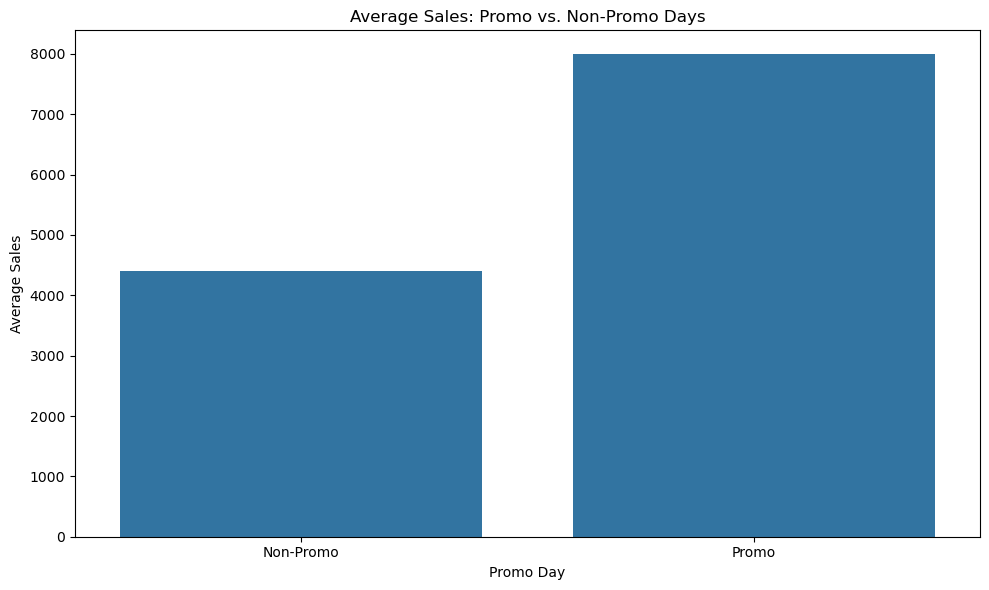

In [91]:
plt.figure(figsize=(10, 6))

sns.barplot(x=['Non-Promo', 'Promo'], y=[Promotion_Sales[0], Promotion_Sales[1]])
plt.title('Average Sales: Promo vs. Non-Promo Days')
plt.xlabel('Promo Day')
plt.ylabel('Average Sales')

plt.tight_layout()
plt.show()

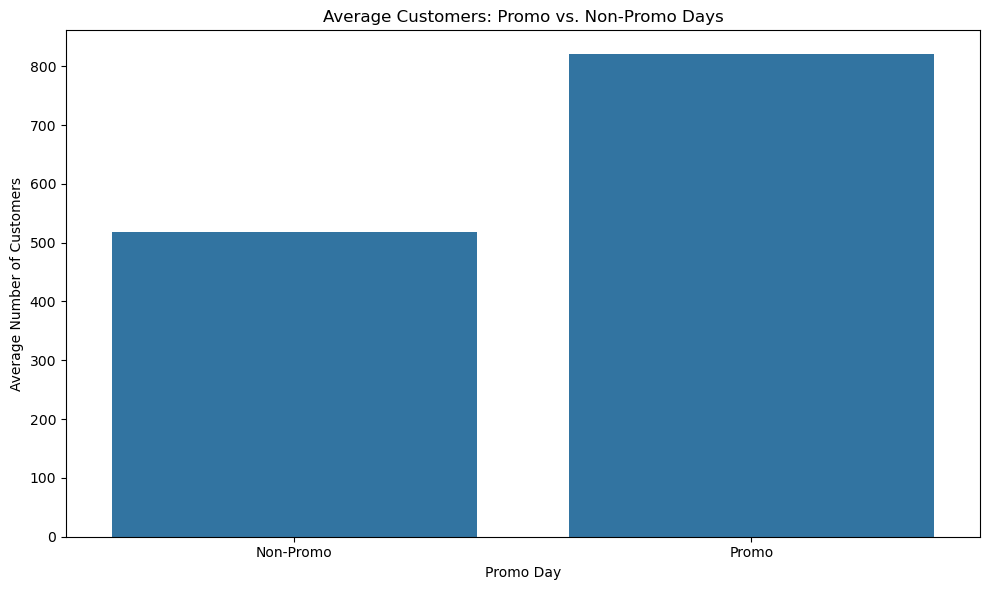

In [93]:
plt.figure(figsize=(10, 6))

sns.barplot(x=['Non-Promo', 'Promo'], y=[Promotion_Customers[0], Promotion_Customers[1]])
plt.title('Average Customers: Promo vs. Non-Promo Days')
plt.xlabel('Promo Day')
plt.ylabel('Average Number of Customers')

plt.tight_layout()
plt.show()

# STORE DATA 

In [5]:
Store_Data  = pd.read_csv('store.csv')

In [6]:
Store_Data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
Store_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
Store_Data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [10]:
Store_Data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

***Treatmet For Missing Values Using Loop Function***

In [16]:
for i in Store_Data.columns:
    #print("The datatype for {} is {}".format(i,store[i].dtypes))
    if Store_Data[i].dtypes == "object":
        mode_value = Store_Data[i].mode()[0]
        Store_Data[i].fillna(mode_value, inplace = True)
    elif Store_Data[i].dtypes != "object":
        mean_value = Store_Data[i].mean()
        Store_Data[i].fillna(mean_value, inplace = True)

In [18]:
Store_Data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

***Identifying Trends of customer behavior during store open and closing times***


In [25]:
# Determining the minimum and maximum dates in the dataset to find the range of years
min_date = test_data['Date'].min()
max_date = test_data['Date'].max()
print('test_min_date :',min_date)
print('test_max_date :',max_date)

test_min_date : 2015-08-01
test_max_date : 2015-09-17


In [26]:
# Extract 'Date', 'Sales', and 'Customers' columns
date_sales_customers = train_data[['Date', 'Sales', 'Customers']]

# Display the extracted data
print(date_sales_customers)

               Date  Sales  Customers
0        2015-07-31   5263        555
1        2015-07-31   6064        625
2        2015-07-31   8314        821
3        2015-07-31  13995       1498
4        2015-07-31   4822        559
...             ...    ...        ...
1017204  2013-01-01      0          0
1017205  2013-01-01      0          0
1017206  2013-01-01      0          0
1017207  2013-01-01      0          0
1017208  2013-01-01      0          0

[1017209 rows x 3 columns]


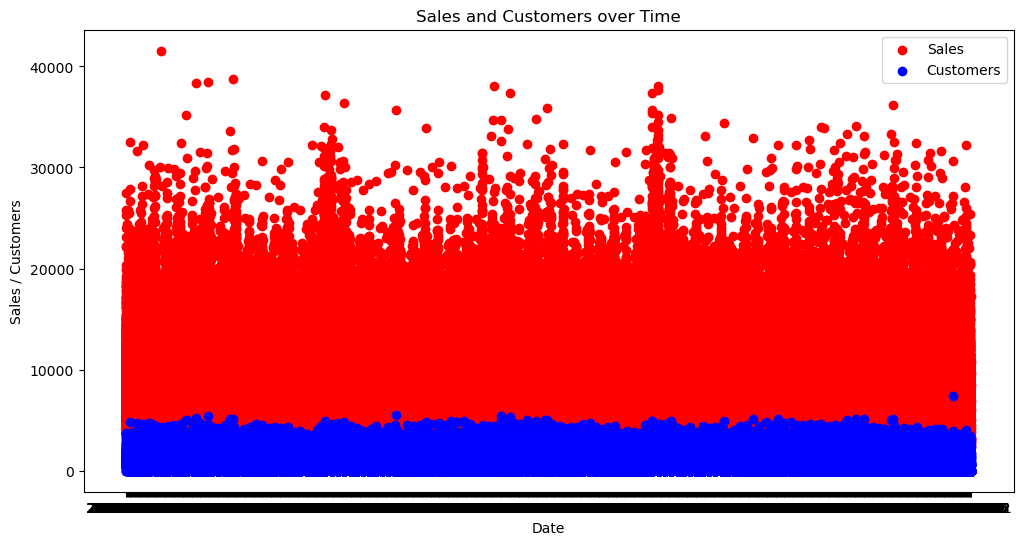

In [32]:
# Scatter plot for 'Sales' and 'Customers'
plt.figure(figsize=(12, 6))
plt.scatter(date_sales_customers.index, date_sales_customers['Sales'], label='Sales', color='Red')
plt.scatter(date_sales_customers.index, date_sales_customers['Customers'], label='Customers', color='Blue')
plt.xlabel('Date')
plt.ylabel('Sales / Customers')
plt.title('Sales and Customers over Time')
plt.legend()
plt.show()

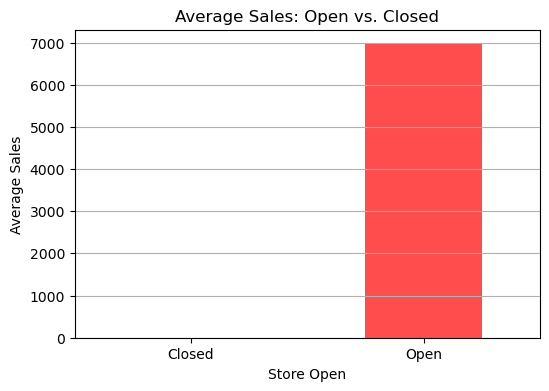

In [35]:
average_sales_open = train_data.groupby('Open')['Sales'].mean()

# Create a bar plot to visualize the average sales based on the 'Open' status
plt.figure(figsize=(6, 4))
average_sales_open.plot(kind='bar', color='Red', alpha=0.7)
plt.xlabel('Store Open')
plt.ylabel('Average Sales')
plt.title('Average Sales: Open vs. Closed')
plt.xticks([0, 1], ['Closed', 'Open'], rotation=0)
plt.grid(axis='y')
plt.show()